# lab5

## 3.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

   Code  Actual Voltage (V)  Fitted Voltage (V)  INL (LSB)  DNL (LSB)
0     0              -0.010           -0.010000   0.000000        NaN
1     1               0.105            0.098571   0.064286       0.15
2     2               0.195            0.207143  -0.121429      -0.10
3     3               0.280            0.315714  -0.357143      -0.15
4     4               0.370            0.424286  -0.542857      -0.10
5     5               0.480            0.532857  -0.528571       0.10
6     6               0.600            0.641429  -0.414286       0.20
7     7               0.750            0.750000   0.000000       0.50


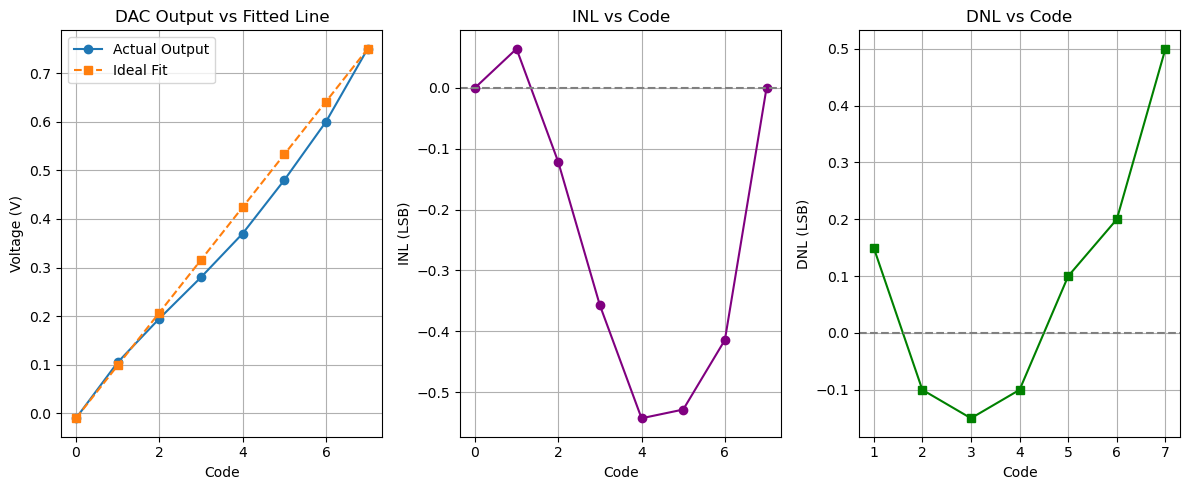

In [ ]:
def third_3():

    
    codes = np.arange(8)
    actual_voltages = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])
    lsb = 0.1

    
    v_start = actual_voltages[0]
    v_end = actual_voltages[-1]
    gain = (v_end - v_start) / (len(codes) - 1)
    fitted_voltages = v_start + gain * codes

    
    inl = (actual_voltages - fitted_voltages) / lsb

    
    actual_steps = np.diff(actual_voltages)
    dnl = (actual_steps / lsb) - 1
    dnl_full = np.append([np.nan], dnl)  # 补齐首个码位

    
    df = pd.DataFrame({
        'Code': codes,
        'Actual Voltage (V)': actual_voltages,
        'Fitted Voltage (V)': fitted_voltages,
        'INL (LSB)': inl,
        'DNL (LSB)': dnl_full
    })

    print(df)  

    
    plt.figure(figsize=(12, 5))

    
    plt.subplot(1, 3, 1)
    plt.plot(codes, actual_voltages, 'o-', label='Actual Output')
    plt.plot(codes, fitted_voltages, 's--', label='Ideal Fit')
    plt.xlabel('Code')
    plt.ylabel('Voltage (V)')
    plt.title('DAC Output vs Fitted Line')
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 3, 2)
    plt.plot(codes, inl, 'o-', color='purple')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Code')
    plt.ylabel('INL (LSB)')
    plt.title('INL vs Code')
    plt.grid(True)

    
    plt.subplot(1, 3, 3)
    plt.plot(codes, dnl_full, 's-', color='green')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Code')
    plt.ylabel('DNL (LSB)')
    plt.title('DNL vs Code')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    df.to_csv("dac_linearity_analysis.csv", index=False)
third_3()


    Code  Histogram Count  DNL (LSB)     INL (LSB)
0      0               43  -0.606632 -6.066324e-01
1      1              115   0.052030 -5.546026e-01
2      2               85  -0.222413 -7.770154e-01
3      3              101  -0.076043 -8.530589e-01
4      4              122   0.116066 -7.369926e-01
5      5              170   0.555174 -1.818182e-01
6      6               75  -0.313894 -4.957118e-01
7      7              146   0.335620 -1.600915e-01
8      8              125   0.143511 -1.658090e-02
9      9               60  -0.451115 -4.676958e-01
10    10               95  -0.130932 -5.986278e-01
11    11               95  -0.130932 -7.295597e-01
12    12              115   0.052030 -6.775300e-01
13    13               40  -0.634077 -1.311607e+00
14    14              120   0.097770 -1.213836e+00
15    15              242   1.213836 -4.440892e-16


C:\Users\Kaiyue Hu\AppData\Local\Temp\ipykernel_22332\2773853365.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(codes, dnl, basefmt=" ", use_line_collection=True)


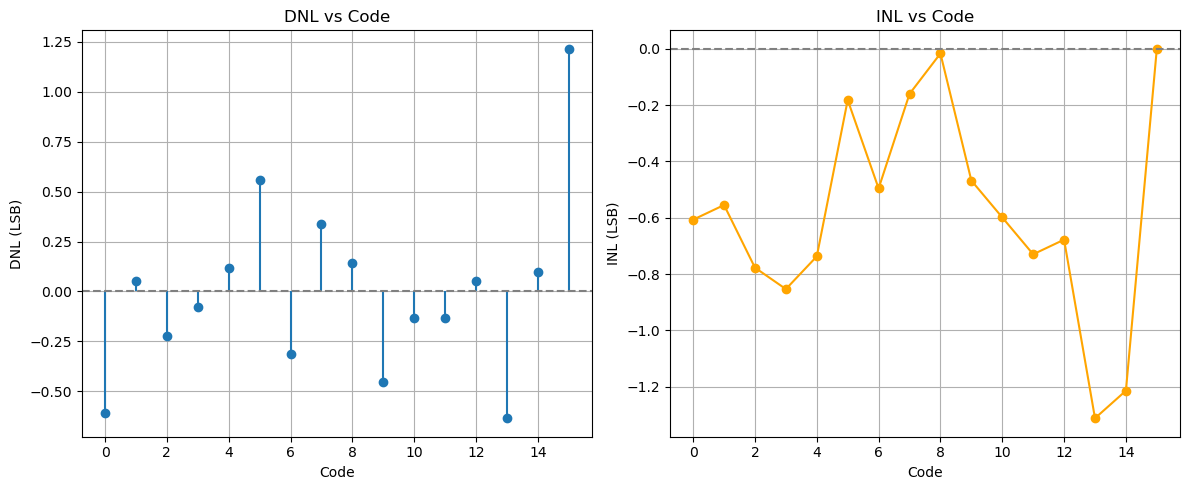

PermissionError: [Errno 13] Permission denied: 'dac_linearity_analysis 2.csv'

In [ ]:
def four_a():

    
    counts = np.array([43, 115, 85, 101, 122, 170, 75, 146,
                    125, 60, 95, 95, 115, 40, 120, 242])
    codes = np.arange(len(counts))  

    
    total_count = np.sum(counts)
    ideal_count = total_count / len(counts)  

    
    dnl = (counts / ideal_count) - 1

    
    inl = np.cumsum(dnl)

    
    df = pd.DataFrame({
        'Code': codes,
        'Histogram Count': counts,
        'DNL (LSB)': dnl,
        'INL (LSB)': inl
    })

    print(df)  

    
    plt.figure(figsize=(12, 5))

    # DNL Plot
    plt.subplot(1, 2, 1)
    plt.stem(codes, dnl, basefmt=" ", use_line_collection=True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('DNL vs Code')
    plt.xlabel('Code')
    plt.ylabel('DNL (LSB)')
    plt.grid(True)

    # INL Plot
    plt.subplot(1, 2, 2)
    plt.plot(codes, inl, 'o-', color='orange')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('INL vs Code')
    plt.xlabel('Code')
    plt.ylabel('INL (LSB)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    df.to_csv("dac_linearity_analysis 2.csv", index=False)
four_a()


Code | DNL | INL | Ideal_V | Actual_V
   0 |  0.0 |   0.0 |    0.00 |     0.50
   1 | -0.5 |  -0.5 |    1.00 |     1.07
   2 |  0.0 |  -0.5 |    2.00 |     2.14
   3 |  0.5 |   0.0 |    3.00 |     3.71
   4 | -1.0 |  -1.0 |    4.00 |     3.79
   5 |  0.5 |  -0.5 |    5.00 |     5.36
   6 |  0.5 |   0.0 |    6.00 |     6.93
   7 |  0.0 |   0.0 |    7.00 |     8.00


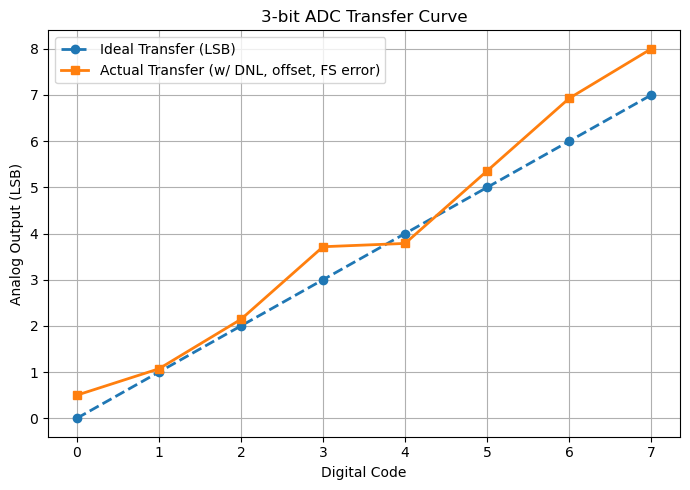

In [ ]:
def five():

    
    dnl = np.array([0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0])  

    
    inl = np.cumsum(dnl)

    
    num_codes = len(dnl)
    ideal_codes = np.arange(num_codes)
    lsb = 1.0  # 单位为 LSB
    offset_error = 0.5 * lsb
    full_scale_error = 0.5 * lsb
    gain_error = full_scale_error / (num_codes - 1)  

    
    ideal_voltage = ideal_codes * lsb
    actual_voltage = offset_error + ideal_codes * (lsb + gain_error) + inl

    
    print("Code | DNL | INL | Ideal_V | Actual_V")
    for i in range(num_codes):
        print(f"{i:4d} | {dnl[i]:4.1f} | {inl[i]:5.1f} | {ideal_voltage[i]:7.2f} | {actual_voltage[i]:8.2f}")


    plt.figure(figsize=(7, 5))
    plt.plot(ideal_codes, ideal_voltage, 'o--', label='Ideal Transfer (LSB)', linewidth=2)
    plt.plot(ideal_codes, actual_voltage, 's-', label='Actual Transfer (w/ DNL, offset, FS error)', linewidth=2)
    plt.xlabel('Digital Code')
    plt.ylabel('Analog Output (LSB)')
    plt.title('3-bit ADC Transfer Curve')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

five()
